# ***Import Libraries And Aplly random Forst Classfier On Titanic Dataset***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier



# ***Read Csv File***

In [2]:
df = pd.read_csv("/content/train.csv")

In [5]:
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ***Apply Some EDA***

In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


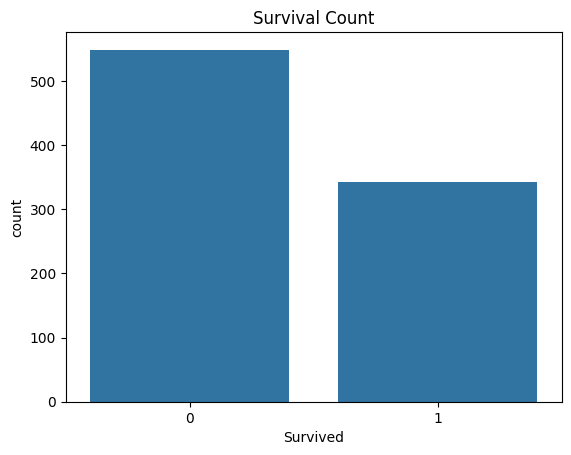

In [7]:
# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Visual survival distribution
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

# ***Draw Survived Pie Chart***

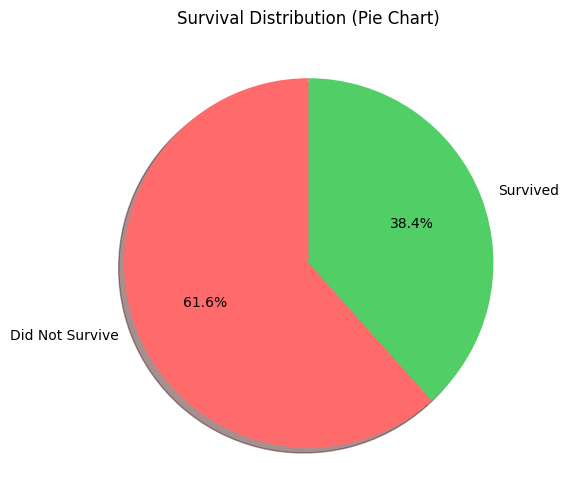

In [8]:

survival_counts = df['Survived'].value_counts()
labels = ['Did Not Survive', 'Survived']

plt.figure(figsize=(6,6))
plt.pie(
    survival_counts,
    labels=labels,
    autopct='%1.1f%%',
    colors=['#ff6b6b', '#51cf66'],
    startangle=90,
    shadow=True
)
plt.title("Survival Distribution (Pie Chart)")
plt.show()


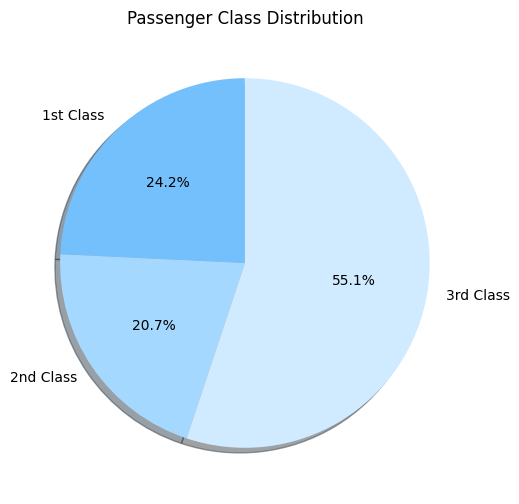

In [9]:

class_counts = df['Pclass'].value_counts().sort_index()
labels = ['1st Class', '2nd Class', '3rd Class']

plt.figure(figsize=(6,6))
plt.pie(
    class_counts,
    labels=labels,
    autopct='%1.1f%%',
    colors=['#74c0fc', '#a5d8ff', '#d0ebff'],
    startangle=90,
    shadow=True
)
plt.title("Passenger Class Distribution")
plt.show()


# ***Gender Distribution***

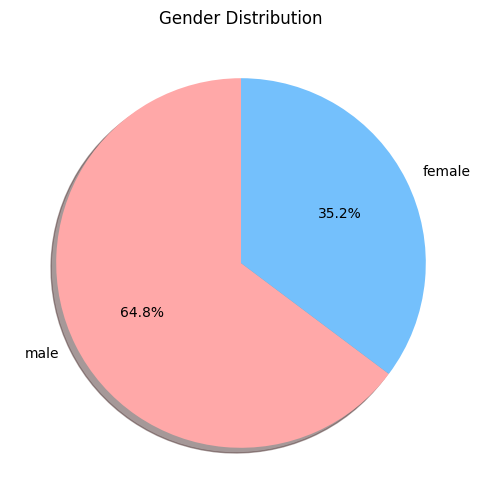

In [10]:

sex_counts = df['Sex'].value_counts()
labels = sex_counts.index

plt.figure(figsize=(6,6))
plt.pie(
    sex_counts,
    labels=labels,
    autopct='%1.1f%%',
    colors=['#ffa8a8', '#74c0fc'],
    startangle=90,
    shadow=True
)
plt.title("Gender Distribution")
plt.show()


# ***select The Features***

In [14]:

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target = "Survived"

df = df[features + [target]]


df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


X = df[features]
y = df[target]


/tmp/ipython-input-342973682.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-342973682.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

# ***Apply Train Test Split***

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [19]:
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
categorical_features = ["Sex", "Embarked", "Pclass"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)


# ***Random Forest Classifier Model***

In [21]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_split=4,
    random_state=42
)

pipeline = Pipeline(steps=[("preprocess", preprocessor),
                          ("rf", model)])


# ***Train Model***

In [22]:
pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds))


Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.64      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



# ***Confusion Matrix***

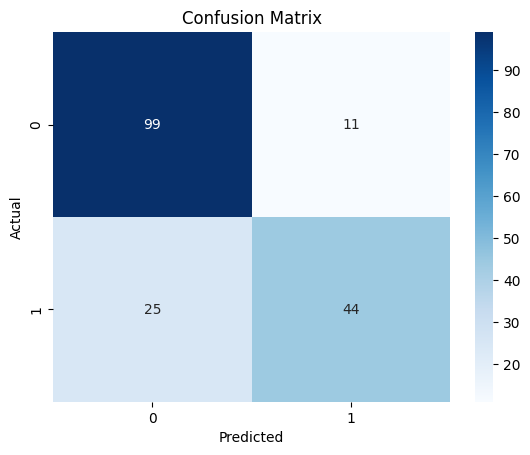

In [23]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ***Extract Important Feature After one Hot encoding***

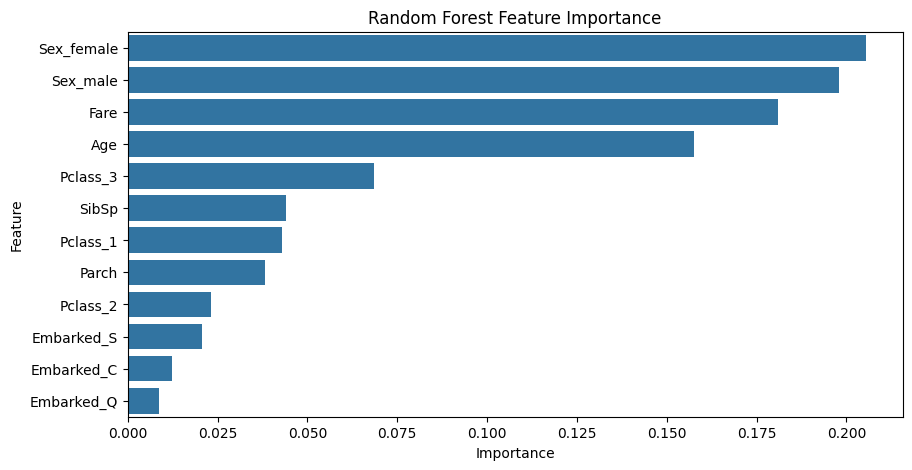

,Feature,Importance
4,Sex_female,0.205373
5,Sex_male,0.197795
1,Fare,0.181010
0,Age,0.157504
11,Pclass_3,0.068436
2,SibSp,0.044099
9,Pclass_1,0.042899
3,Parch,0.038176
10,Pclass_2,0.023092
8,Embarked_S,0.020562


In [24]:
ohe = pipeline.named_steps["preprocess"].named_transformers_["cat"]
encoded_cols = ohe.get_feature_names_out(categorical_features)

all_features = numeric_features + list(encoded_cols)

importances = pipeline.named_steps["rf"].feature_importances_

# Create DataFrame
fi_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x="Importance", y="Feature", data=fi_df)
plt.title("Random Forest Feature Importance")
plt.show()

fi_df